<a href="https://colab.research.google.com/github/arkaprabha10/COVID-19-DATA-ANALYSIS/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# for csv file
link='https://drive.google.com/file/d/14aEtw3PE3kZ5fY1i5GrcKQKXVldYRGcS/view?usp=sharing'
id = link.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('owid-covid-data.csv')
df = pd.read_csv('owid-covid-data.csv') 
print(df.shape)

(83211, 59)


In [30]:
#  for csv file
link='https://drive.google.com/file/d/13QYgFjQ3ztf_TxgK21CobYI3hCchAqFm/view?usp=sharing'
id = link.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('govt_index.csv')
df_gov = pd.read_csv('govt_index.csv') 
print(df_gov.shape)

(137690, 51)


In [31]:
#  for csv file
link='https://drive.google.com/file/d/1m1DH6MDIf_A-2FaDASROgiPfyZZmAYMQ/view?usp=sharing'
id = link.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('govt_index.csv')
df_vaccine = pd.read_csv('govt_index.csv') 
print(df_vaccine.shape)

(16176, 12)


In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
print("total size of data is = ",df.shape)
print()
missing_values_count = df.isnull().sum()
print("Feature with highest number of missing data is ,")
print(missing_values_count.nlargest(n=50))
print()
print("% data which is missing = ",missing_values_count.sum()/np.product(df.shape)*100)

In [ ]:
temp_df = df[~np.isnan(df['weekly_icu_admissions' ])]
print(temp_df.shape)
print(temp_df.groupby(['location']).mean())


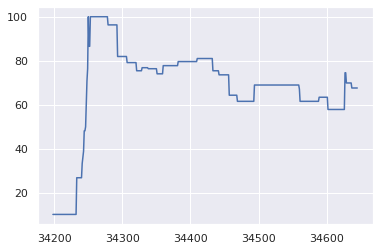

In [20]:
# INDIA
df_india = df[df['location']=='India']

df_india_total_cases = df_india['total_cases']
df_india_total_cases = df_india_total_cases.fillna(0)
# plt.plot(df_india_total_cases)

df_india_total_cases_per_million = df_india['total_cases_per_million']
df_india_total_cases_per_million = df_india_total_cases_per_million.fillna(0)
# plt.plot(df_india_total_cases_per_million)


df_india_new_cases = df_india['new_cases']
df_india_new_cases = df_india_new_cases.fillna(0)
# plt.plot(df_india_new_cases)

df_india_new_cases_per_million = df_india['new_cases_per_million']
df_india_new_cases_per_million = df_india_new_cases_per_million.fillna(0)
# plt.plot(df_india_new_cases_per_million)


df_india_total_death = df_india['total_deaths']
df_india_total_death = df_india_total_death.fillna(0)
# plt.plot(df_india_total_death)

df_india_total_deaths_per_million = df_india['total_deaths_per_million']
df_india_total_deaths_per_million = df_india_total_deaths_per_million.fillna(0)
# plt.plot(df_india_total_deaths_per_million)


# handle outlier here
df_india_new_death = df_india['new_deaths']
df_india_new_death = df_india_new_death.fillna(0)
# plt.plot(df_india_new_death)

df_india_new_deaths_per_million = df_india['new_deaths_per_million']
df_india_new_deaths_per_million = df_india_new_deaths_per_million.fillna(0)
# plt.plot(df_india_new_deaths_per_million)



df_india_reproduction = df_india['reproduction_rate']
# missing_values_count = df_india_reproduction.isnull().sum()
# print(missing_values_count)
x=df_india_reproduction.dropna()
val = x.iloc[0]
val1 =x.iloc[-1]

df_india_reproduction = df_india_reproduction.fillna(val)
df_india_reproduction.iloc[-1] = val1
# plt.plot(df_india_reproduction)

df_india_stringency = df_india['stringency_index']
df_india_stringency = df_india_stringency.fillna(method = 'bfill', axis=0).fillna(df_india_stringency.dropna().mean())
plt.plot(df_india_stringency)



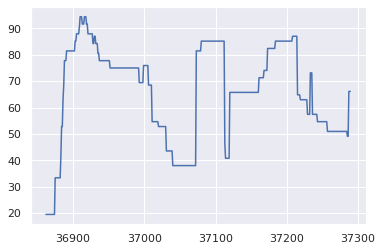

In [21]:
# ISRAEL
df_israel = df[df['location']=='Israel']

df_israel_total_cases = df_israel['total_cases']
df_israel_total_cases = df_israel_total_cases.fillna(0)
# plt.plot(df_israel_total_cases)

df_israel_total_cases_per_million = df_israel['total_cases_per_million']
df_israel_total_cases_per_million = df_israel_total_cases_per_million.fillna(0)
# plt.plot(df_israel_total_cases_per_million)


df_israel_new_cases = df_israel['new_cases']
df_israel_new_cases = df_israel_new_cases.fillna(0)
# plt.plot(df_israel_new_cases)

df_israel_new_cases_per_million = df_israel['new_cases_per_million']
df_israela_new_cases_per_million = df_israel_new_cases_per_million.fillna(0)
# plt.plot(df_israel_new_cases_per_million)


df_israel_total_death = df_israel['total_deaths']
df_israel_total_death = df_israel_total_death.fillna(0)
# plt.plot(df_israel_total_death)

df_israel_total_deaths_per_million = df_israel['total_deaths_per_million']
df_israel_total_deaths_per_million = df_israel_total_deaths_per_million.fillna(0)
# plt.plot(df_israel_total_deaths_per_million)


# handle outlier here
df_israel_new_death = df_israel['new_deaths']
df_israel_new_death = df_israel_new_death.fillna(0)
# plt.plot(df_israel_new_death)

df_israel_new_deaths_per_million = df_israel['new_deaths_per_million']
df_israel_new_deaths_per_million = df_israel_new_deaths_per_million.fillna(0)
# plt.plot(df_israel_new_deaths_per_million)


df_israel_reproduction = df_israel['reproduction_rate']
# missing_values_count = df_israel_reproduction.isnull().sum()
# print(missing_values_count)
x=df_israel_reproduction.dropna()
val1 =x.iloc[-1]
# df_israel_reproduction = df_israel_reproduction.fillna(val)
# df_israel_reproduction.iloc[-1] = val1
# df_israel_reproduction.iloc[0] = val

df_israel_reproduction = df_israel_reproduction.fillna(method = 'bfill', axis=0).fillna(val1)
# plt.plot(df_israel_reproduction)

df_israel_stringency = df_israel['stringency_index']
df_israel_stringency = df_israel_stringency.fillna(method = 'bfill', axis=0).fillna(df_israel_stringency.dropna().mean())
plt.plot(df_israel_stringency)



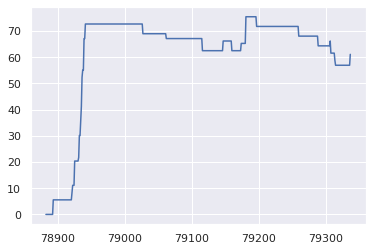

In [22]:
# USA
df_usa = df[df['location']=='United States']

df_usa_total_cases = df_usa['total_cases']
df_usa_total_cases = df_usa_total_cases.fillna(0)
# plt.plot(df_usa_total_cases)

df_usa_total_cases_per_million = df_usa['total_cases_per_million']
df_usa_total_cases_per_million = df_usa_total_cases_per_million.fillna(0)
# plt.plot(df_usa_total_cases_per_million)

df_usa_new_cases = df_usa['new_cases']
df_usa_new_cases = df_usa_new_cases.fillna(0)
# plt.plot(df_usa_new_cases)

df_usa_new_cases_per_million = df_usa['new_cases_per_million']
df_usa_new_cases_per_million = df_usa_new_cases_per_million.fillna(0)
# plt.plot(df_usa_new_cases_per_million)

df_usa_total_death = df_usa['total_deaths']
df_usa_total_death = df_usa_total_death.fillna(0)
# plt.plot(df_usa_total_death)

df_usa_total_deaths_per_million = df_usa['total_deaths_per_million']
df_usa_total_deaths_per_million = df_usa_total_deaths_per_million.fillna(0)
# plt.plot(df_usa_total_deaths_per_million)


df_usa_new_death = df_usa['new_deaths']
df_usa_new_death = df_usa_new_death.fillna(0)
# plt.plot(df_usa_new_death)

df_usa_new_deaths_per_million = df_usa['new_deaths_per_million']
df_usa_new_deaths_per_million = df_usa_new_deaths_per_million.fillna(0)
# plt.plot(df_usa_new_deaths_per_million)


df_usa_reproduction = df_usa['reproduction_rate']
x=df_usa_reproduction.dropna()
val = x.iloc[0]
val1 =x.iloc[-1]
df_usa_reproduction = df_usa_reproduction.fillna(val)
df_usa_reproduction.iloc[-1] = val1
# plt.plot(df_usa_reproduction)


df_usa_stringency = df_usa['stringency_index']
df_usa_stringency = df_usa_stringency.fillna(method = 'bfill', axis=0).fillna(df_usa_stringency.dropna().mean())
plt.plot(df_usa_stringency)

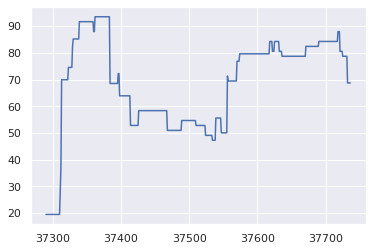

In [24]:
# Italy
df_italy = df[df['location']=='Italy']

df_italy_total_cases = df_italy['total_cases']
df_italy_total_cases = df_italy_total_cases.fillna(0)
# plt.plot(df_italy_total_cases)

df_italy_total_cases_per_million = df_italy['total_cases_per_million']
df_italy_total_cases_per_million = df_italy_total_cases_per_million.fillna(0)
# plt.plot(df_italy_total_cases_per_million)


df_italy_new_cases = df_italy['new_cases']
df_italy_new_cases = df_italy_new_cases.fillna(0)
# plt.plot(df_italy_new_cases)
# plt.show()

df_italy_new_cases_per_million = df_italy['new_cases_per_million']
df_italy_new_cases_per_million = df_italy_new_cases_per_million.fillna(0)
# plt.plot(df_italy_new_cases_per_million)


df_italy_total_death = df_italy['total_deaths']
df_italy_total_death = df_italy_total_death.fillna(0)
# plt.plot(df_italy_total_death)

df_italy_total_deaths_per_million = df_italy['total_deaths_per_million']
df_italy_total_deaths_per_million = df_italy_total_deaths_per_million.fillna(0)
# plt.plot(df_italy_total_deaths_per_million)


df_italy_new_death = df_italy['new_deaths'].clip(lower=0)
df_italy_new_death = df_italy_new_death.fillna(0)
# df_italy_new_death = df_italy_new_death.clip(lower=0)
# plt.plot(df_italy_new_death)

df_italy_new_deaths_per_million = df_italy['new_deaths_per_million'].clip(lower=0)
df_italy_new_deaths_per_million = df_italy_new_deaths_per_million.fillna(0)
# plt.plot(df_italy_new_deaths_per_million)


df_italy_reproduction = df_italy['reproduction_rate']
x=df_italy_reproduction.dropna()
val = x.iloc[0]
val1 =x.iloc[-1]
df_italy_reproduction = df_italy_reproduction.fillna(val)
df_italy_reproduction.iloc[-1] = val1
# plt.plot(df_italy_reproduction)



df_italy_stringency = df_italy['stringency_index']
df_italy_stringency = df_italy_stringency.fillna(method = 'bfill', axis=0).fillna(df_italy_stringency.dropna().mean())
plt.plot(df_italy_stringency)

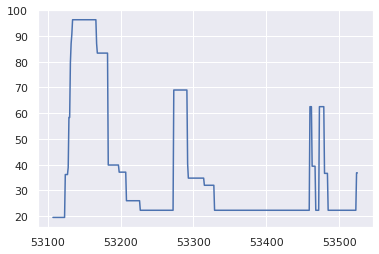

In [25]:
# New Zealand
df_nz = df[df['location']=='New Zealand']

df_nz_total_cases = df_nz['total_cases']
df_nz_total_cases = df_nz_total_cases.fillna(0)
# plt.plot(df_nz_total_cases)

df_nz_total_cases_per_million = df_nz['total_cases_per_million']
df_nz_total_cases_per_million = df_nz_total_cases_per_million.fillna(0)
# plt.plot(df_nz_total_cases_per_million)


df_nz_new_cases = df_nz['new_cases']
df_nz_new_cases = df_nz_new_cases.fillna(0)
# plt.plot(df_nz_new_cases)
# plt.show()

df_nz_new_cases_per_million = df_nz['new_cases_per_million']
df_nz_new_cases_per_million = df_nz_new_cases_per_million.fillna(0)
# plt.plot(df_nz_new_cases_per_million)

df_nz_total_death = df_nz['total_deaths']
df_nz_total_death = df_nz_total_death.fillna(0)
# plt.plot(df_nz_total_death)

df_nz_total_deaths_per_million = df_nz['total_deaths_per_million']
df_nz_total_deaths_per_million = df_nz_total_deaths_per_million.fillna(0)
# plt.plot(df_nz_total_deaths_per_million)

df_nz_new_death = df_nz['new_deaths']
df_nz_new_death = df_nz_new_death.fillna(0)
df_nz_new_death = df_nz_new_death.clip(lower=0)
# plt.plot(df_nz_new_death)

df_nz_new_deaths_per_million = df_nz['new_deaths_per_million']
df_nz_new_deaths_per_million = df_nz_new_deaths_per_million.fillna(0)
# plt.plot(df_nz_new_deaths_per_million)


df_nz_reproduction = df_nz['reproduction_rate']
x=df_nz_reproduction.dropna()
val = x.iloc[0]
val1 =x.iloc[-1]
df_nz_reproduction = df_nz_reproduction.fillna(val)
df_nz_reproduction.iloc[-1] = val1
# plt.plot(df_nz_reproduction)


df_nz_stringency = df_nz['stringency_index']
df_nz_stringency = df_nz_stringency.fillna(method = 'bfill', axis=0).fillna(df_nz_stringency.dropna().mean())
plt.plot(df_nz_stringency)

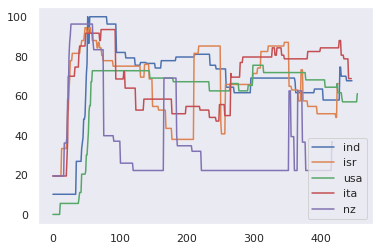

In [29]:
plt.figure()
plt.plot(df_india_stringency.to_numpy(),label='ind')
plt.plot(df_israel_stringency.to_numpy(),label='isr')
plt.plot(df_usa_stringency.to_numpy(),label='usa')
plt.plot(df_italy_stringency.to_numpy(),label='ita')
plt.plot(df_nz_stringency.to_numpy(),label='nz')
plt.legend()

plt.grid()